In [113]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from folium import plugins
from folium.plugins import MarkerCluster
import math
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
df = pd.read_csv('bos_311.csv',  skip_blank_lines=True)
df.head(5)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101000295613,2011-07-01 01:32:33,2011-07-15 01:32:32,2011-07-01 05:06:58,ONTIME,Closed,Case Closed Case Resolved replaced 100 amp fus...,Street Light Outages,Public Works Department,Street Lights,...,B3,Greater Mattapan,7,Ward 17,1714,INTERSECTION Groveland St & River St,NaN,42.2715,-71.0772,Employee Generated
1,101000295614,2011-07-01 02:18:31,2011-07-05 02:18:31,2011-07-01 06:12:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,E5,Roslindale,10,Ward 20,2008,39 Lorraine St,2131.0,42.2839,-71.1447,Self Service
2,101000295620,2011-07-01 06:24:38,2011-07-15 06:24:38,2011-08-23 10:33:03,OVERDUE,Closed,Case Closed Case Resolved Job Completed.,Street Light Outages,Public Works Department,Street Lights,...,E13,Roxbury,13,Ward 11,1103,INTERSECTION Bragdon St & Washington St,NaN,42.3173,-71.0968,Constituent Call
3,101000295624,2011-07-01 06:50:25,NaN,2011-07-01 06:50:29,ONTIME,Closed,Case Closed Internal Case,Highway Maintenance,Public Works Department,Highway Maintenance,...,C11,Dorchester,7,Ward 13,1309,1053 Dorchester Ave,2125.0,42.3594,-71.0587,Employee Generated
4,101000295625,2011-07-01 06:55:10,2011-07-05 06:55:10,2011-07-05 09:42:04,OVERDUE,Closed,Case Closed Case Resolved Delivered on 7/5. ...,Sticker Request,Public Works Department,Recycling,...,C6,South Boston / South Boston Waterfront,5,Ward 7,0701,392 K St,2127.0,42.3305,-71.0371,Self Service


In [3]:
# fix zipcode
df['location_zipcode'] = df['location_zipcode'].multiply(10)
df['location_zipcode'] = pd.Series(df['location_zipcode'], dtype='Int64')

# other columns that are ints
df['neighborhood_services_district'] = pd.Series(df['neighborhood_services_district'], dtype='Int64')
df['city_council_district'] = pd.Series(df['city_council_district'], dtype='Int64')
df['fire_district'] = pd.Series(df['fire_district'], dtype='Int64')

# fix dates
df['open_dt'] =pd.to_datetime(df['open_dt'],infer_datetime_format=True)
df['target_dt'] =pd.to_datetime(df['target_dt'],infer_datetime_format=True)
df['closed_dt'] =pd.to_datetime(df['closed_dt'],infer_datetime_format=True)

In [4]:
def get_data_by_year(year, df):
    start_dt = '{}-01-01'.format(year)
    end_dt = '{}-12-31'.format(year)
    
    data_of_year = df[(df['open_dt'] > start_dt) & (df['open_dt'] < end_dt)]
    
    return data_of_year

In [8]:
# [2011, 2012, ..., 2018]
data_by_year = [get_data_by_year(i, df) for i in range(2011, 2019)]

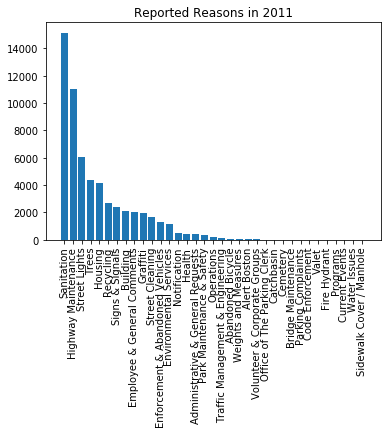

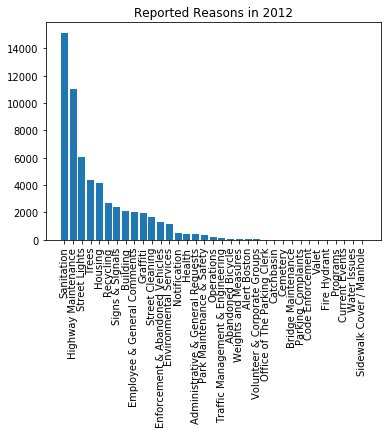

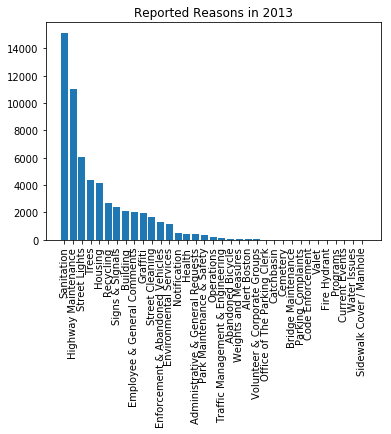

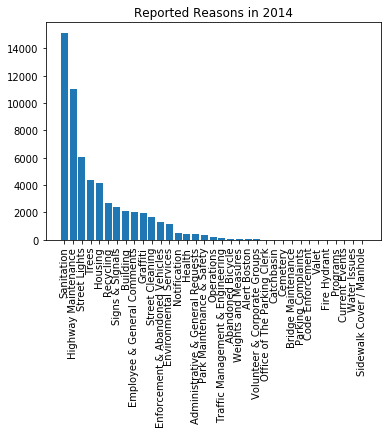

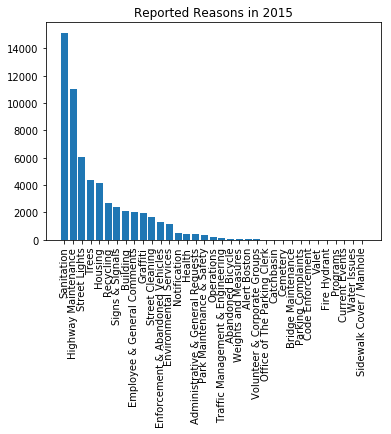

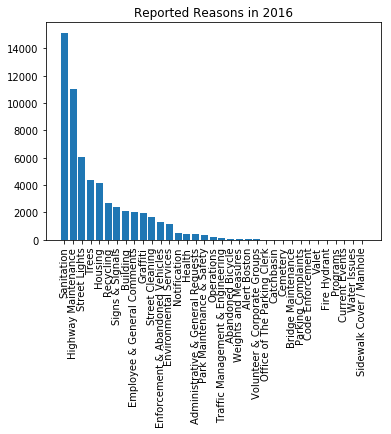

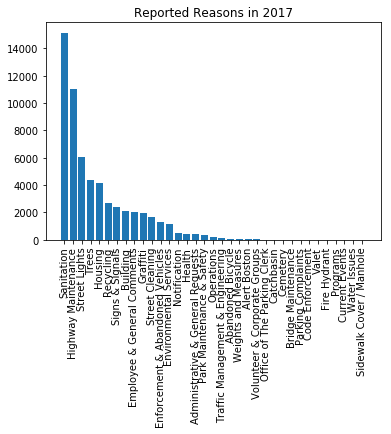

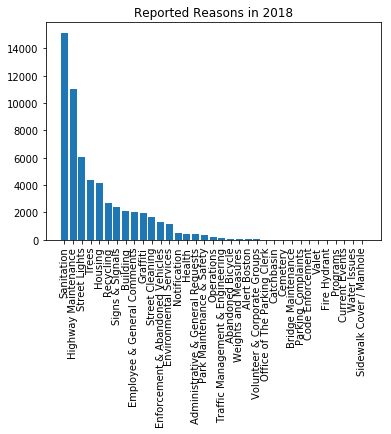

In [29]:
for i in range(len(data_by_year)):
    reason_count_of_year  = dict(data_by_year[i].reason.value_counts())
    # x, y
    reason_list, reason_count_list = list(reason_counts.keys()), list(reason_counts.values())
    y_pos = np.arange(len(reason_list))
    
    plt.bar(y_pos, reason_count_list, align='center')
    plt.xticks(y_pos, reason_list, rotation=90)
    plt.title('Reported Reasons in {}'.format(2010 + i + 1))
    plt.show()
    

In [34]:
neighborhood_list = list(df['neighborhood'].unique())
# removing bad values for bad neighborhood names
# neighborhood_list.remove(' ')
# neighborhood_list.remove(neighborhood_list[-2])

['Greater Mattapan',
 'Roslindale',
 'Roxbury',
 'Dorchester',
 'South Boston / South Boston Waterfront',
 'West Roxbury',
 'Allston / Brighton',
 'Jamaica Plain',
 'East Boston',
 'Hyde Park',
 'Downtown / Financial District',
 'Boston',
 'Back Bay',
 'Beacon Hill',
 'Mission Hill',
 'Brighton',
 'Charlestown',
 'Mattapan',
 'South Boston',
 'South End',
 'Fenway / Kenmore / Audubon Circle / Longwood',
 'Allston',
 'Chestnut Hill']

In [158]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#668899', '#cd8c95', '#00b3b3',
         '#0e2f44', '#c481fb', '#3899e8', '#8d2914', '#669977', '#66ccff', '#997766', '#ffbbad', '#66b2b2', '#5d0f25'
         ]#'#660066', '#decfd3', '#668899']

In [91]:
main_case_reasons = df.reason.unique()
top_20_reasons = list(dict(df.reason.value_counts()).keys())[0:20]

In [159]:
case_reasons_color_map = dict(zip(top_20_reasons, colors))
case_reasons_color_map

{'Sanitation': 'b',
 'Street Cleaning': 'g',
 'Highway Maintenance': 'r',
 'Enforcement & Abandoned Vehicles': 'c',
 'Code Enforcement': 'm',
 'Signs & Signals': 'y',
 'Street Lights': 'k',
 'Building': '#668899',
 'Housing': '#cd8c95',
 'Trees': '#00b3b3',
 'Recycling': '#0e2f44',
 'Graffiti': '#c481fb',
 'Park Maintenance & Safety': '#3899e8',
 'Employee & General Comments': '#8d2914',
 'Environmental Services': '#669977',
 'Animal Issues': '#66ccff',
 'Administrative & General Requests': '#997766',
 'Needle Program': '#ffbbad',
 'Health': '#66b2b2',
 'Notification': '#5d0f25'}

In [164]:
def generate_case_counts_for_neighborhood(neighborhood_name):
    
    # mapping dict set up
    mapping_dict = dict(zip(top_20_reasons, [[] for i in range(len(top_20_reasons))]))
    
    for i in range(len(data_by_year)):
        inc_val = i
        curr_yr = 2010 + inc_val + 1
        
        neighborhood_data = data_by_year[i][data_by_year[i].neighborhood == neighborhood_name]
        nbh_reasons = dict(neighborhood_data.reason.value_counts())
        
        if ' ' in nbh_reasons:
            del nbh_reasons[' ']
        
        if math.nan in nbh_reasons:
            del nbh_reasons[math.nan]
        
        for key in mapping_dict.keys():
            if key in nbh_reasons.keys():
                mapping_dict[key].append(nbh_reasons[key])
            else:
                mapping_dict[key].append(0)
            
    p = []
    plt.figure(figsize=(15,10))
    plt.title('Top 20 Reported Issues in {}'.format(neighborhood_name))
    
    for k, v in mapping_dict.items():
        patch = mpatches.Patch(color=case_reasons_color_map[k], label=k)
        p.append(patch)
        plt.plot(list(range(2011, 2019)), v, color=case_reasons_color_map[k])

    plt.legend(handles=p, loc=0, )
    
    return mapping_dict

In [49]:
x = dict(data_by_year[0][data_by_year[0].neighborhood == 'Dorchester'].reason.value_counts())
del x['Sanitation']
math.nan

nan

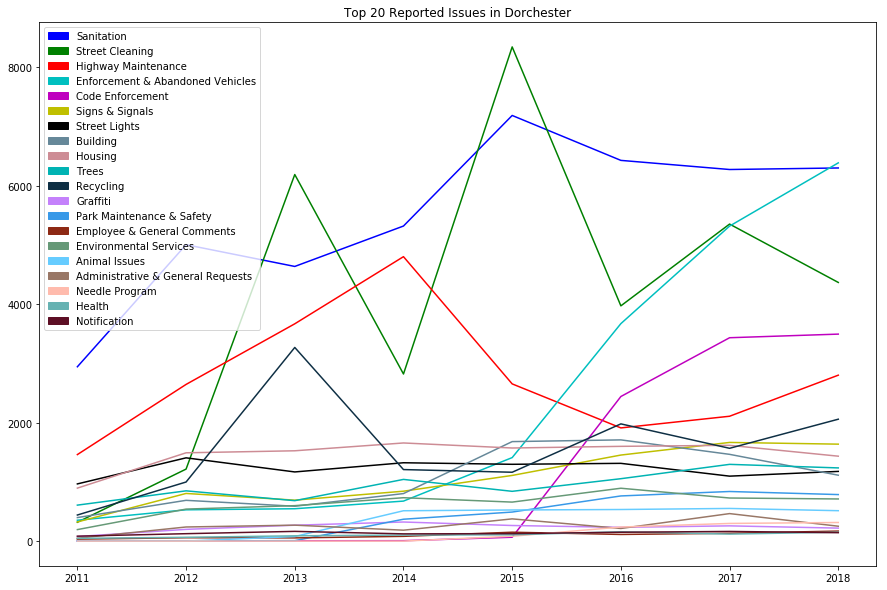

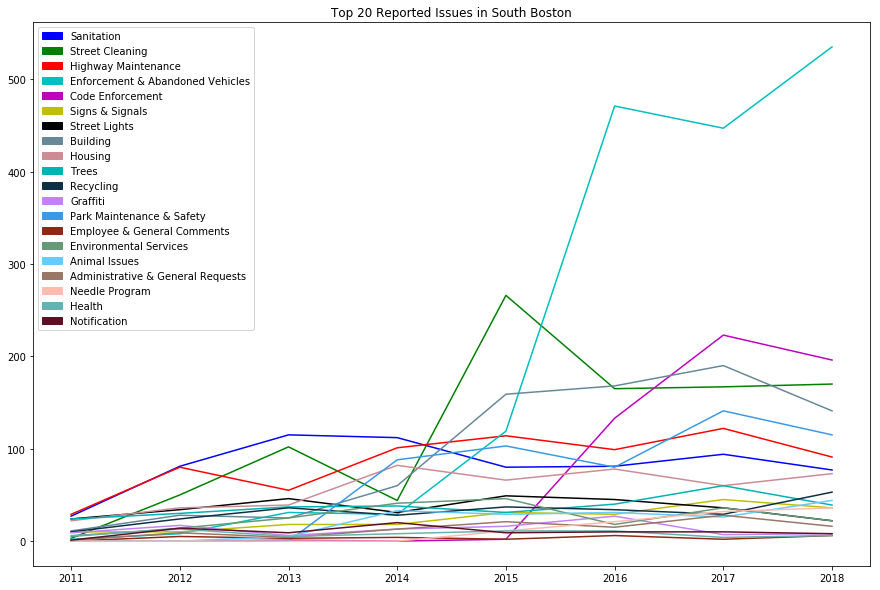

In [163]:
# print(generate_case_counts_for_neighborhood('Dorchester'))
generate_case_counts_for_neighborhood('Dorchester')
generate_case_counts_for_neighborhood('South Boston')

In [187]:
df_time_given = (data_by_year[0]['target_dt'] - data_by_year[0]['open_dt']).to_frame('time_given')
df_time_taken = (data_by_year[0]['closed_dt'] - data_by_year[0]['open_dt']).to_frame('time_taken')
df_dates_and_cat = pd.concat([df_time_given, df_time_taken, df['ontime'], df['case_status'], df['reason']],axis=1)
df_dates_and_cat


,time_given,time_taken,ontime,case_status,reason
0,13 days 23:59:59,0 days 03:34:25,ONTIME,Closed,Street Lights
1,4 days 00:00:00,0 days 03:54:12,ONTIME,Closed,Sanitation
2,14 days 00:00:00,53 days 04:08:25,OVERDUE,Closed,Street Lights
3,NaT,0 days 00:00:04,ONTIME,Closed,Highway Maintenance
4,4 days 00:00:00,4 days 02:46:54,OVERDUE,Closed,Recycling
5,3 days 23:59:59,0 days 00:09:13,ONTIME,Closed,Sanitation
6,3 days 23:59:59,0 days 00:00:40,ONTIME,Closed,Sanitation
7,3 days 23:59:59,0 days 00:00:19,ONTIME,Closed,Sanitation
8,3 days 23:59:58,0 days 00:00:28,ONTIME,Closed,Sanitation
9,63 days 00:00:00,NaT,OVERDUE,Open,Graffiti


In [191]:
given_time_notnull = df_dates_and_cat[df_dates_and_cat.time_given.notnull()]
given_time_notnull[given_time_notnull.time_taken.notnull()]

,time_given,time_taken,ontime,case_status,reason
0,13 days 23:59:59,0 days 03:34:25,ONTIME,Closed,Street Lights
1,4 days 00:00:00,0 days 03:54:12,ONTIME,Closed,Sanitation
2,14 days 00:00:00,53 days 04:08:25,OVERDUE,Closed,Street Lights
4,4 days 00:00:00,4 days 02:46:54,OVERDUE,Closed,Recycling
5,3 days 23:59:59,0 days 00:09:13,ONTIME,Closed,Sanitation
6,3 days 23:59:59,0 days 00:00:40,ONTIME,Closed,Sanitation
7,3 days 23:59:59,0 days 00:00:19,ONTIME,Closed,Sanitation
8,3 days 23:59:58,0 days 00:00:28,ONTIME,Closed,Sanitation
23,365 days 00:00:00,0 days 00:00:05,ONTIME,Closed,Highway Maintenance
32,44 days 23:59:51,5 days 06:42:01,ONTIME,Closed,Street Lights
